# Logistic Regression

# 1. Data Exploration:

a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.


In [1]:
# Importing important libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [2]:
#loading the dataset

titanic = pd.read_csv("Titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Display the first few rows
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:

# Inspect the data types of each column
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Summary statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Check for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Check for duplicate records
print(f"Number of duplicate records: {titanic.duplicated().sum()}")


Number of duplicate records: 0


# Visualisations

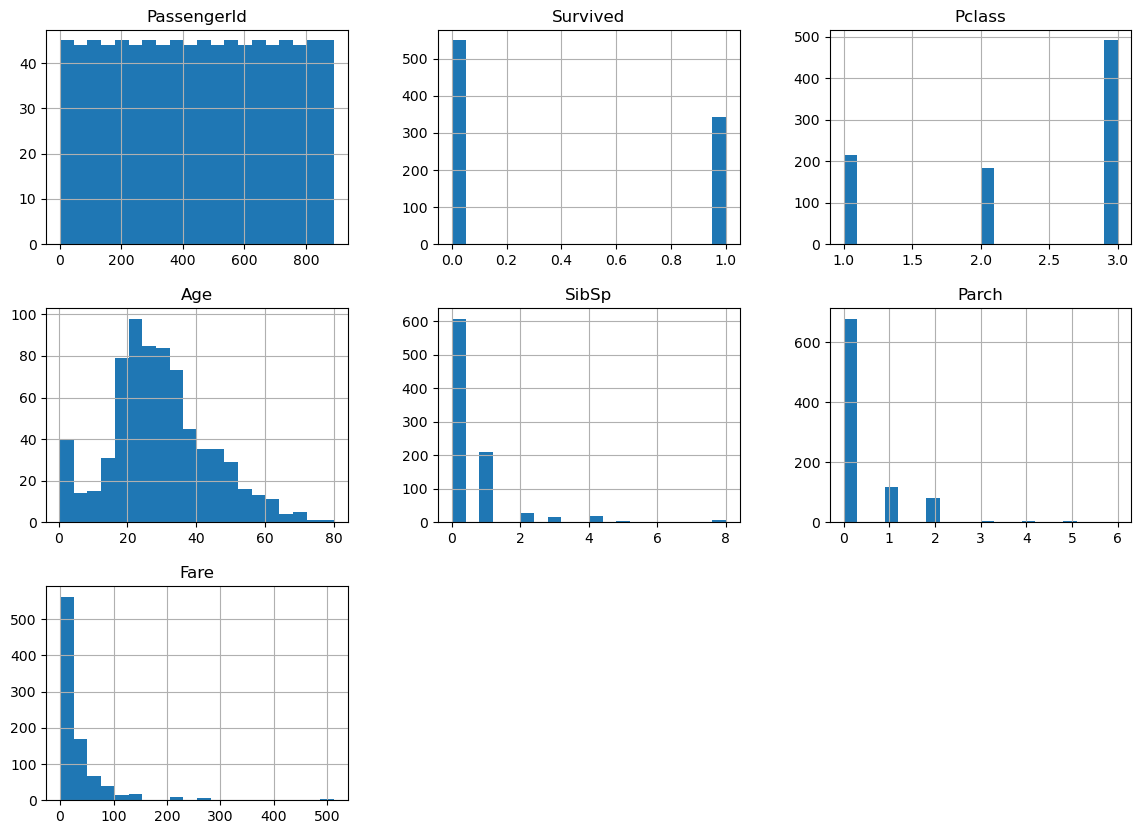

In [16]:
# Histograms for numerical columns
titanic.hist(bins=20, figsize=(14, 10))
plt.show()

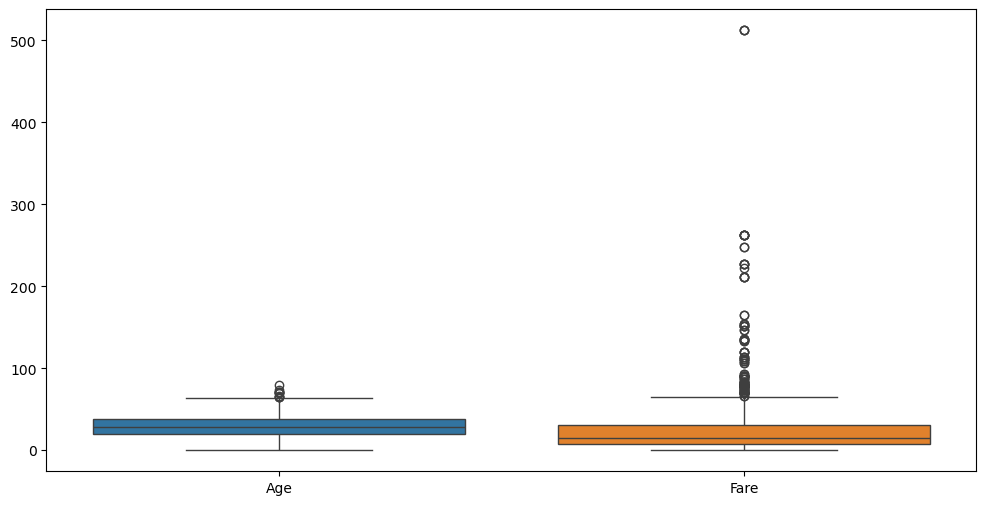

In [18]:
# Box plots for numerical columns to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic[['Age', 'Fare']])
plt.show()

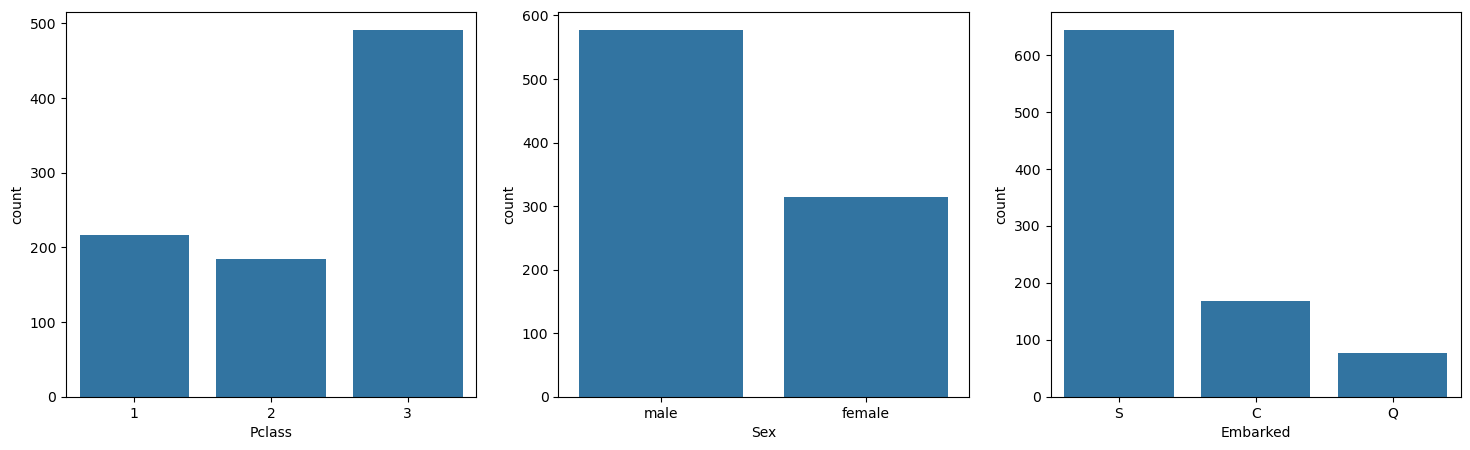

In [20]:
# Bar plots for categorical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(ax=axes[0], data=titanic, x='Pclass')
sns.countplot(ax=axes[1], data=titanic, x='Sex')
sns.countplot(ax=axes[2], data=titanic, x='Embarked')

plt.show()

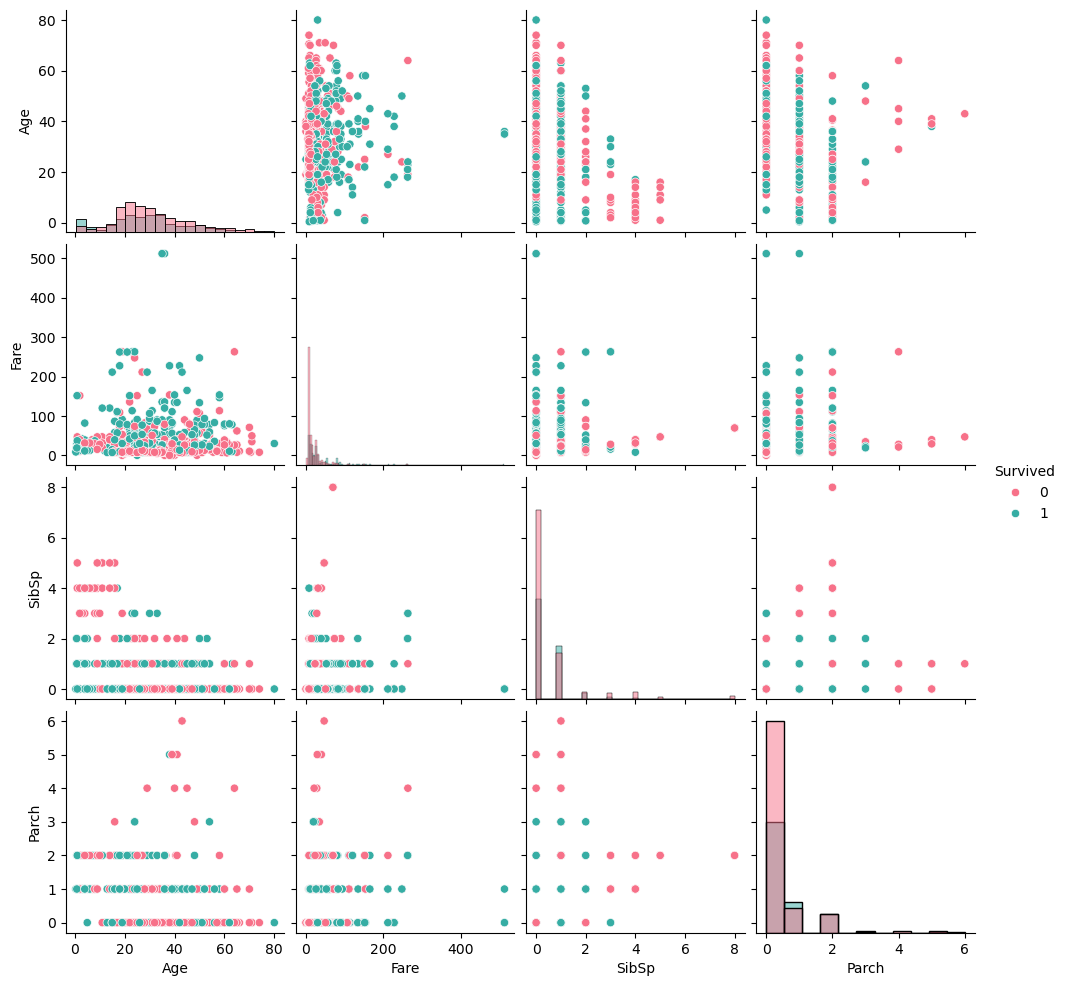

In [22]:
#pair plot
sns.pairplot(titanic, hue='Survived', diag_kind='hist', 
             vars=['Age', 'Fare', 'SibSp', 'Parch'], 
             palette='husl')
plt.show()

# 2. Data Preprocessing:

a. Handle missing values (e.g., imputation).

b. Encode categorical variables.


In [30]:

# Handling missing values (e.g., impute missing age values with the median age)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Drop the 'Cabin' column as it has too many missing values
titanic.drop(columns=['Cabin'], inplace=True)



# Fill missing values in 'Embarked' with the most frequent value (mode)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


# Verify if missing values are handled
titanic.isnull().sum()

C:\Users\Shree\AppData\Local\Temp\ipykernel_3064\1809094697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


KeyError: "['Cabin'] not found in axis"

In [ ]:
# One-hot encode the 'Sex' column
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

# One-hot encode the 'Embarked' column
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

# Display the first few rows of the dataframe after encoding
titanic.head()

# 3. Model Building:

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.


In [34]:
# Define features (X) and target (y)
X = titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = titanic['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 4. Model Evaluation:

a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

Visualize the ROC curve.


In [37]:

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 score: {f1:.2f}')

# Calculate ROC AUC score
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC score: {roc_auc:.2f}')

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 score: 0.76
ROC AUC score: 0.88


# Visualize ROC Curve

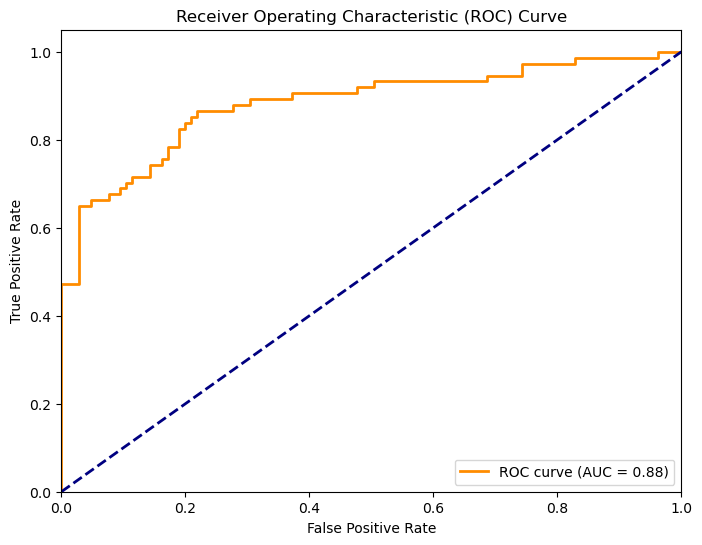

In [40]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 5. Interpretation:

# a. Interpret the coefficients of the logistic regression model.


In [52]:
# Print the coefficients and intercept
print('Intercept:', model.intercept_[0])
print('Coefficients:')
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f'{feature}: {coef:.4f}')

Intercept: 4.528049245227421
Coefficients:
Pclass: -0.9358
Age: -0.0305
SibSp: -0.2945
Parch: -0.1093
Fare: 0.0026
Sex_male: -2.5912
Embarked_Q: -0.1153
Embarked_S: -0.4006


# b. Discuss the Significance of Features

To discuss the significance of features in predicting survival probability, consider both the magnitude (absolute value) and direction (positive or negative) of the coefficients:


Pclass: Passengers in higher classes (1st class) had higher chances of survival (Pclass coefficient is negative, indicating lower class numbers are associated with higher survival odds).

Age: Younger passengers tended to have higher survival odds (Age coefficient is negative).

SibSp and Parch: Having more siblings, spouses, parents, or children onboard tended to decrease survival odds (SibSp and Parch coefficients are negative).

Fare: Higher fares (indicative of higher socioeconomic status) were associated with higher survival odds (Fare coefficient is positive).

Sex_male: Being male decreased the odds of survival significantly (Sex_male coefficient is negative, indicating being male is associated with lower survival odds).

Embarked_Q and Embarked_S: Embarking from Queenstown (Embarked_Q) and Southampton (Embarked_S) ports were associated with lower survival odds compared to Cherbourg (Embarked_C) (coefficients are negative).

In [63]:
import pickle

In [65]:
pickle.dump(model,open('LRmodel.pkl','wb'))